#### Dataset: DepEd 10% Schools (Stratified) 2015 NAT takers

- Classification goal: To predict NAT Overall Score
- Number of Instances: 736 for depedSS.csv
- Number of Attributes: 20 + output attribute.


### Attributes (DepEd ES data)
   1. SchID: unique 6-digit code assigned to public school (numeric)
   2. SchName : name of school (object: text)
   3. DivName : division name (object: mixed characters)
   4. DivCode : division code (object: mixed characters)
   5. Clusters: NAT grouping by DepEd (categorical: "1", "2", "3", "4", "5", "6")
   6. Region: schools regional location (categorical: values 1 to 16)
   7. Filipino: school average filipino NAT score (numerical 0 to 100)
   8. AralinP: school average araling panlipunan NAT score (numerical 0 to 100)
   9. Mathematics: school average mathematics NAT score (numerical 0 to 100)
   10. Science: school average science NAT score  (numerical 0 to 100)
   11. English: school average english NAT score (numerical 0 to 100)
   12. Overall: school average NAT score (numerical 0 to 100)
   13. Internet: does school have internet (binary: 0 means "no", 1 means "yes")
   14. Lat: latitude coordinate location of school (numeric: -90 to 90)
   15. Long: longitude coordinate location of school (numeric: -180 to 180)
   16. Enrolled: number of students  (numeric)     
   17. Teacher: number of teacher items (numeric)     
   18. Ratio: teacher to student ratio(numeric between 0 to 1)
   19. Energized : does school have electricity (binary: 0 means "no", 1 means "yes")
   20. SchType: type of school (categorical: "School with no annexes","mother school", "Annex or extension")

## Import Libraries

### Standard Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [3]:
from scipy.stats import norm
from scipy import stats

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [4]:
DF = pd.read_csv('DepEd_SS.csv')

________

# 1. Exploratory Data Analysis (EDA)

## Describe the Data

In [5]:
# Check if the Data loaded correctly
DF.head()

,SchID,SchName,DivisionName,DivisionCode,Province,MunicipalityORCity,Clusters,Region,Filipino,AralinP,Mathematics,Science,English,CriticalThinking,Overall,Internet,Lat,Long,Enrolled,Teachers,Ratio,Energized,SchoolType,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
0,317312,La-Union Integrated HS,Cabadbaran City,R10,AGUSAN DEL NORTE,CITY OF CABADBARAN,4,CARAGA,58.89,43.22,35.29,42.11,50.80,51.72,46.77,0,9.08,125.54,266,10,27.00,1,Annex or Extension school(s),12911,2,28,20,72
1,304690,Lingayao NHS,Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,5,CARAGA,80.20,71.37,74.76,82.33,74.87,76.50,76.75,0,8.74,125.46,273,11,24.82,1,School with no Annexes,12911,2,28,20,72
2,304689,Las Nieves NHS,Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,3,CARAGA,71.19,66.06,82.99,85.38,70.01,39.39,72.57,1,8.67,125.45,748,42,17.81,1,School with no Annexes,12911,2,28,20,72
3,317310,E. G. Montilla NHS (Mat-I NHS Annex),Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,5,CARAGA,68.61,64.01,57.47,66.84,53.95,28.98,60.18,1,8.72,125.58,511,27,19.00,1,Annex or Extension school(s),12911,2,28,20,72
4,317311,Balangbalang NHS (Agay NHS Annex),Agusan Del Norte,R01,AGUSAN DEL NORTE,REMEDIOS T. ROMUALDEZ,4,CARAGA,72.94,69.42,85.22,84.77,68.38,31.25,72.96,0,9.05,125.62,511,27,19.00,1,Annex or Extension school(s),12911,2,28,20,72


In [6]:
# Check the dimensions
DF.shape

(736, 28)

In [7]:
#Check the features
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
SchID                 736 non-null int64
SchName               736 non-null object
DivisionName          736 non-null object
DivisionCode          736 non-null object
Province              736 non-null object
MunicipalityORCity    736 non-null object
Clusters              736 non-null int64
Region                736 non-null object
Filipino              736 non-null float64
AralinP               736 non-null float64
Mathematics           736 non-null float64
Science               736 non-null float64
English               736 non-null float64
CriticalThinking      736 non-null float64
Overall               736 non-null float64
Internet              736 non-null int64
Lat                   736 non-null float64
Long                  736 non-null float64
Enrolled              736 non-null int64
Teachers              736 non-null int64
Ratio                 736 non-null float64
Energize

In [8]:
#Check for Column Names
DF.columns

Index([u'SchID', u'SchName', u'DivisionName', u'DivisionCode', u'Province',
       u'MunicipalityORCity', u'Clusters', u'Region', u'Filipino', u'AralinP',
       u'Mathematics', u'Science', u'English', u'CriticalThinking', u'Overall',
       u'Internet', u'Lat', u'Long', u'Enrolled', u'Teachers', u'Ratio',
       u'Energized', u'SchoolType', u'PBOR', u'PovertyCluster',
       u'PovertyIncidence', u'LowerLimit', u'UpperLimit'],
      dtype='object')

In [9]:
#Get the Stats on the Data
DF.describe(include='all')

,SchID,SchName,DivisionName,DivisionCode,Province,MunicipalityORCity,Clusters,Region,Filipino,AralinP,Mathematics,Science,English,CriticalThinking,Overall,Internet,Lat,Long,Enrolled,Teachers,Ratio,Energized,SchoolType,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
count,736.00,736,736,736,736,736,736.00,736,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736,736.00,736.00,736.00,736.00,736.00
unique,nan,715,164,165,82,526,nan,17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,nan,nan,nan
top,nan,Libertad NHS,Cebu,G02,CEBU,CEBU CITY (Capital),nan,VII,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,School with no Annexes,nan,nan,nan,nan,nan
freq,nan,3,27,27,50,6,nan,85,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,515,nan,nan,nan,nan,nan
mean,304827.57,NaN,NaN,NaN,NaN,NaN,3.52,NaN,60.04,50.05,52.82,49.22,47.44,45.61,51.48,0.73,17.82,116.86,895.64,31.55,36.27,0.97,NaN,11705.80,3.02,21.79,15.87,27.43
std,13912.41,NaN,NaN,NaN,NaN,NaN,1.30,NaN,8.27,9.31,18.63,14.56,11.72,13.58,10.83,0.44,25.44,25.19,1134.64,40.68,70.78,0.18,NaN,2789.11,1.26,13.48,11.24,16.37
min,100189.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,29.88,27.74,21.65,25.60,24.84,20.68,27.27,0.00,5.41,6.09,60.00,1.00,5.84,0.00,NaN,672.00,1.00,0.00,0.00,0.00
25%,301973.75,NaN,NaN,NaN,NaN,NaN,3.00,NaN,54.97,43.42,35.95,36.90,38.38,34.79,42.54,0.00,9.03,121.01,290.00,10.00,24.43,1.00,NaN,10751.00,2.00,12.00,9.00,16.00
50%,303663.50,NaN,NaN,NaN,NaN,NaN,4.00,NaN,59.42,49.07,51.37,47.05,45.55,43.12,50.21,1.00,11.92,122.99,508.00,18.00,27.09,1.00,NaN,11751.00,3.00,19.00,14.00,24.00
75%,306035.75,NaN,NaN,NaN,NaN,NaN,5.00,NaN,65.44,55.45,67.39,60.50,55.20,54.45,59.55,1.00,14.83,124.19,973.25,34.00,31.00,1.00,NaN,12911.00,4.00,30.00,21.00,40.00


## Verify Data Quality

Look out for the following:
* Incorrect or unexpected data type & format (ALL)
* Duplicates (ALL)
* Unexpected dimensions (i.e. missing rows or columns) (ALL)
* Incorrect Spelling (CAT)
* Mixed cases for strings (CAT)
* Unexpected outliers or anomalous values (NUM)
* Inconsistent or incorrect units of measurement (NUM)

### All

In [10]:
#Incorrect or unexpected data type & format (ALL)
DF.dtypes

SchID                   int64
SchName                object
DivisionName           object
DivisionCode           object
Province               object
MunicipalityORCity     object
Clusters                int64
Region                 object
Filipino              float64
AralinP               float64
Mathematics           float64
Science               float64
English               float64
CriticalThinking      float64
Overall               float64
Internet                int64
Lat                   float64
Long                  float64
Enrolled                int64
Teachers                int64
Ratio                 float64
Energized               int64
SchoolType             object
PBOR                    int64
PovertyCluster          int64
PovertyIncidence        int64
LowerLimit              int64
UpperLimit              int64
dtype: object

In [11]:
#Duplicates (ALL). 

# Checks for Duplicated Samples
DF.duplicated().value_counts()

False    736
dtype: int64

**Check Columns for Missing Values**

In [12]:
DF.isnull().sum()
#df.info works also

SchID                 0
SchName               0
DivisionName          0
DivisionCode          0
Province              0
MunicipalityORCity    0
Clusters              0
Region                0
Filipino              0
AralinP               0
Mathematics           0
Science               0
English               0
CriticalThinking      0
Overall               0
Internet              0
Lat                   0
Long                  0
Enrolled              0
Teachers              0
Ratio                 0
Energized             0
SchoolType            0
PBOR                  0
PovertyCluster        0
PovertyIncidence      0
LowerLimit            0
UpperLimit            0
dtype: int64

#### Split the Dataset into Categorical and Numerical Features

In [13]:
#Categorical Features Only
DF_cat = DF.select_dtypes(include=['object'])

#Numerical Features Only
DF_num = DF.select_dtypes(include=['int64','float64'])

### Categorical Data 

In [14]:
#Incorrect Spelling (CAT)
#Mixed cases for strings (CAT)

In [15]:
#Check the Number of Categorical Features
DF_cat.shape

(736, 7)

In [16]:
#Describe the Categorical Features. Check if Number of Unique Values is as expected. 
DF_cat.describe(include='object')

,SchName,DivisionName,DivisionCode,Province,MunicipalityORCity,Region,SchoolType
count,736,736,736,736,736,736,736
unique,715,164,165,82,526,17,3
top,Libertad NHS,Cebu,G02,CEBU,CEBU CITY (Capital),VII,School with no Annexes
freq,3,27,27,50,6,85,515


In [17]:
#Other Methods to Check: Value Counts
DF_cat.Region.value_counts()

VII       85
V         69
IV-A      68
VI        55
VIII      48
I         45
III       43
XII       42
IX        38
CARAGA    36
CAR       35
IV-B      34
X         31
XI        30
II        29
ARMM      25
NCR       23
Name: Region, dtype: int64

In [19]:
#Other Methods to Check: Unique
DF_cat.DivisionName.unique()

array(['Cabadbaran City', 'Agusan Del Norte', 'Agusan Del Sur',
       'Bayugan City', 'Dinagat Island', 'Surigao City',
       'Surigao Del Norte', 'Surigao Del Sur', 'Bislig City', 'Biliran',
       'Eastern Samar', 'Leyte', 'Baybay City', 'Ormoc City',
       'Northern Samar', 'Southern Leyte', 'Calbayog City',
       'Samar (Western)', 'Catbalogan City', 'Batanes', 'Cagayan',
       'Isabela', 'Santiago City', 'Ilagan City', 'Nueva Vizcaya',
       'Quirino', 'Albay', 'Legaspi City', 'Tabaco City',
       'Camarines Norte', 'Camarines Sur', 'Iriga City', 'Catanduanes',
       'Masbate', 'Sorsogon', 'Sorsogon City', 'Basilan', 'Lamitan',
       'Lanao Del Sur I', 'Lanao Del Sur II', 'Marawi City',
       'Maguindanao I', 'Maguindanao II', 'Sulu', 'Bohol',
       'Tagbilaran City', 'Cebu City', 'Toledo City', 'Cebu',
       'Mandaue City', 'Naga City - R7', 'Talisay City', 'Danao City',
       'Lapu-Lapu City', 'Tanjay City', 'Dumaguete City',
       'Negros Oriental', 'Bayawan City'

In [20]:
#for loop to go over all the features and print out the unique values for each feature. 
for cat_col in DF_cat.columns:
    print (DF[cat_col].value_counts())
    print ("\n---------")

Libertad NHS                                                   3
San Jose NHS                                                   3
San Isidro NHS                                                 3
Sto. Niño NHS                                                  3
Rizal NHS                                                      2
San Antonio NHS                                                2
San Fernando NHS                                               2
Melgar NHS                                                     2
San Pedro NHS                                                  2
Zaragoza National High School                                  2
San Juan NHS                                                   2
Sta. Cruz NHS                                                  2
Maligaya NHS                                                   2
San Roque NHS                                                  2
San Vicente NHS                                                2
Mantalongon NHS          

### Numerical Data 

In [21]:
#Unexpected outliers or anomalous values (NUM)
#Inconsistent or incorrect units of measurement (NUM)

In [22]:
#Check the Number of Numerical Features
DF_num.shape

(736, 21)

In [23]:
#Describe the Numerical Features. Check if the Mean, Min, and Max values are as expected.
DF_num.describe()

,SchID,Clusters,Filipino,AralinP,Mathematics,Science,English,CriticalThinking,Overall,Internet,Lat,Long,Enrolled,Teachers,Ratio,Energized,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
count,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00,736.00
mean,304827.57,3.52,60.04,50.05,52.82,49.22,47.44,45.61,51.48,0.73,17.82,116.86,895.64,31.55,36.27,0.97,11705.80,3.02,21.79,15.87,27.43
std,13912.41,1.30,8.27,9.31,18.63,14.56,11.72,13.58,10.83,0.44,25.44,25.19,1134.64,40.68,70.78,0.18,2789.11,1.26,13.48,11.24,16.37
min,100189.00,1.00,29.88,27.74,21.65,25.60,24.84,20.68,27.27,0.00,5.41,6.09,60.00,1.00,5.84,0.00,672.00,1.00,0.00,0.00,0.00
25%,301973.75,3.00,54.97,43.42,35.95,36.90,38.38,34.79,42.54,0.00,9.03,121.01,290.00,10.00,24.43,1.00,10751.00,2.00,12.00,9.00,16.00
50%,303663.50,4.00,59.42,49.07,51.37,47.05,45.55,43.12,50.21,1.00,11.92,122.99,508.00,18.00,27.09,1.00,11751.00,3.00,19.00,14.00,24.00
75%,306035.75,5.00,65.44,55.45,67.39,60.50,55.20,54.45,59.55,1.00,14.83,124.19,973.25,34.00,31.00,1.00,12911.00,4.00,30.00,21.00,40.00
max,326001.00,6.00,84.15,82.92,98.13,92.63,87.92,91.06,83.13,1.00,125.98,126.57,9907.00,338.00,1736.00,1.00,17864.00,5.00,66.00,61.00,72.00


## Find Patterns, Spot Anomalies, Test Hypothesis using Descriptive Statistics

### Univariate Plots to Check Variable Characteristics

#### Histograms

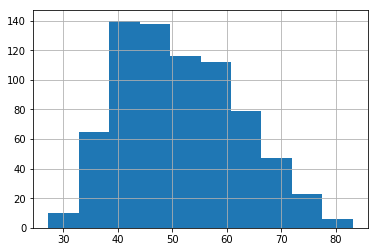

In [24]:
# All features can be plotted on a histogram
DF.Overall.hist()

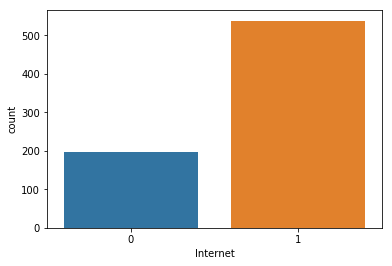

In [25]:
sns.countplot(DF['Internet'])

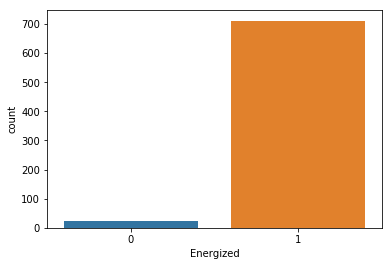

In [26]:
sns.countplot(DF['Energized'])

#### Density Plot

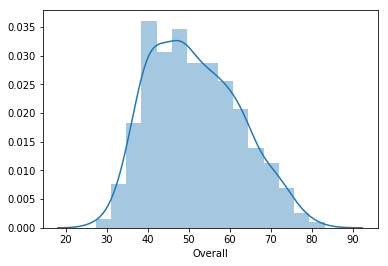

In [27]:
sns.distplot(DF['Overall'])

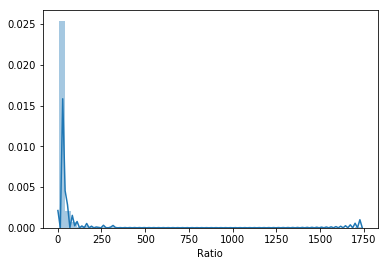

In [28]:
sns.distplot(DF['Ratio'])

#### What can you obseve about the target variable Overall?
* How is it distributed 
* In terms of skewness? 
* Are there outliers?

In [29]:
#Quantify Skewness and Kurtosis
print("Skewness: %f" % DF['Overall'].skew())
print("Kurtosis: %f" % DF['Overall'].kurt())

Skewness: 0.356501
Kurtosis: -0.569275


* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
    * Normal Distribution: = 0
    * Skewed Right: +
    * Skewed Left: -
<br><br>
* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers 
    * Normal Distribution: = 0
    * Heavy Tailed: +
    * Light Tailed: -
    
<a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm">Further Information</a>

#### Box Plot
<a href="https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots">Interpreting Box Plots </a>

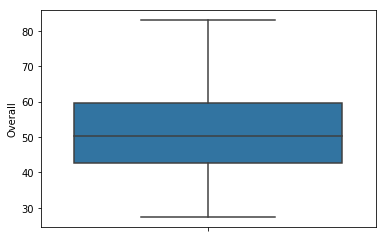

In [30]:
sns.boxplot(DF.Overall, orient='v')

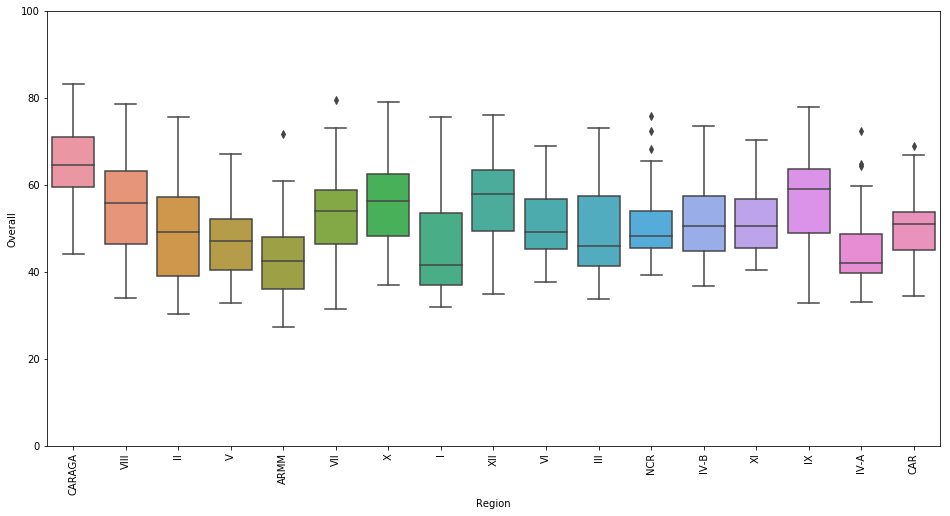

In [31]:
col = 'Region'
data = pd.concat([DF['Overall'], DF[col]], axis=1)

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=col, y="Overall", data=data)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

### Create bins and drop unnecessary columns

In [32]:
DF[['Math', 'Fil', 'AP', 'Sci', 'Eng']] = DF[[ 'Mathematics', 'Filipino', 'AralinP', 'Science', 'English']].astype(int)

In [34]:
DF['Div'] = DF['DivisionName'].astype('category')

In [35]:
bins = [0, 65, 100]
DF['Average'] = np.searchsorted(bins, DF['Overall'].values)

In [37]:
df = DF.drop(['SchID', 'SchName', 'DivisionName', 'Clusters', 'DivisionCode','Lat', 'Long', 'Enrolled', 'Teachers'], axis=1)

In [38]:
df.columns

Index([u'Province', u'MunicipalityORCity', u'Region', u'Filipino', u'AralinP',
       u'Mathematics', u'Science', u'English', u'CriticalThinking', u'Overall',
       u'Internet', u'Ratio', u'Energized', u'SchoolType', u'PBOR',
       u'PovertyCluster', u'PovertyIncidence', u'LowerLimit', u'UpperLimit',
       u'Math', u'Fil', u'AP', u'Sci', u'Eng', u'Div', u'Average'],
      dtype='object')

In [39]:
df[['Region', 'SchoolType']].apply(lambda x: x.astype('category'))

,Region,SchoolType
0,CARAGA,Annex or Extension school(s)
1,CARAGA,School with no Annexes
2,CARAGA,School with no Annexes
3,CARAGA,Annex or Extension school(s)
4,CARAGA,Annex or Extension school(s)
5,CARAGA,School with no Annexes
6,CARAGA,Mother school
7,CARAGA,School with no Annexes
8,CARAGA,School with no Annexes
9,CARAGA,Mother school


In [40]:
df.Region = pd.Categorical(df.Region)
df['Reg'] = df.Region.cat.codes

In [41]:
df.SchoolType = pd.Categorical(df.SchoolType)
df['SType'] = df.SchoolType.cat.codes

In [42]:
df.Div = pd.Categorical(df.Div)
df['DName'] = df.Div.cat.codes

In [46]:
df2 = df.drop(['CriticalThinking', 'DName', 'MunicipalityORCity', 'Province', 'PovertyCluster', 'LowerLimit', 'UpperLimit', 'Mathematics', 'Science', 'English', 'Filipino', 'AralinP', 'Region', 'SchoolType', 'Div', 'Math', 'Fil', 'AP', 'Sci', 'Eng', 'Overall'], axis=1)

In [47]:
df2.head()

,Internet,Ratio,Energized,PBOR,PovertyIncidence,Average,Reg,SType
0,0,27.00,1,12911,28,1,2,0
1,0,24.82,1,12911,28,2,2,2
2,1,17.81,1,12911,28,2,2,2
3,1,19.00,1,12911,28,1,2,0
4,0,19.00,1,12911,28,2,2,0


### Multivariate Plots to Understand Relatonships between Features, Test Hypothesis and Check Assumptions


#### Correlation Matrix

In [48]:
corrmat = df2.corr()

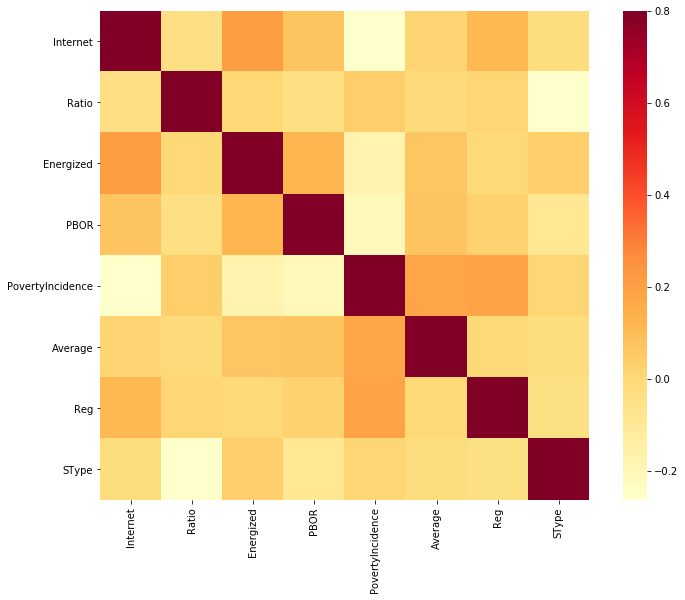

In [49]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlOrRd");

<i> Take note of multi-colinearity! </i>

In [50]:
#View the Correlation Matrix
corrmat

,Internet,Ratio,Energized,PBOR,PovertyIncidence,Average,Reg,SType
Internet,1.00,-0.04,0.21,0.08,-0.26,0.02,0.11,-0.02
Ratio,-0.04,1.00,0.00,-0.04,0.04,-0.01,0.02,-0.26
Energized,0.21,0.00,1.00,0.12,-0.17,0.07,-0.00,0.04
PBOR,0.08,-0.04,0.12,1.00,-0.21,0.08,0.02,-0.09
PovertyIncidence,-0.26,0.04,-0.17,-0.21,1.00,0.18,0.19,0.01
Average,0.02,-0.01,0.07,0.08,0.18,1.00,-0.00,-0.02
Reg,0.11,0.02,-0.00,0.02,0.19,-0.00,1.00,-0.04
SType,-0.02,-0.26,0.04,-0.09,0.01,-0.02,-0.04,1.00


Check features with the highest correlation with target

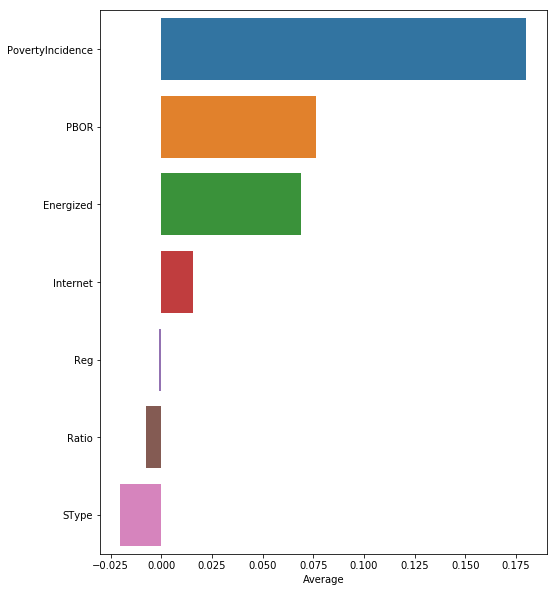

In [51]:
# Feature sorted by correlation to Overall, from positive to negative
corr = corrmat.sort_values('Average', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.Average[1:], corr.index[1:], orient='h')
plt.show()

In [52]:
#Correlation with output variable
cor_target = abs(corrmat["Average"])

#Selecting highly correlated features (Anything with a correlation >0.5)
relevant_features = cor_target[cor_target>0.01]
relevant_features.sort_values(ascending=False)

Average            1.00
PovertyIncidence   0.18
PBOR               0.08
Energized          0.07
SType              0.02
Internet           0.02
Name: Average, dtype: float64

Zoom in on highest correlated features 



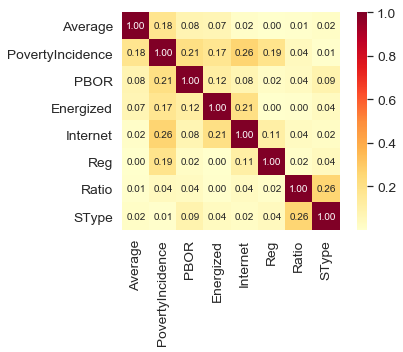

In [53]:
#Saleprice correlation matrix

#number of variables for heatmap
k = 10 

cols = corrmat.nlargest(k, 'Average')['Average'].index

cm = abs(np.corrcoef(df2[cols].values.T))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'YlOrRd', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

Form & test hypothesis -  *which variables contribute to Math score?*  

#### Scatterplots

In [54]:
#Select Features to Plot Against Overall (Target)
cols = ['Ratio', 'Internet', 'Energized', 'Reg', 'PovertyIncidence', 'SType', 'PBOR']

In [55]:
f = pd.melt(df2, id_vars=['Average'], value_vars=sorted(cols))

In [56]:
f.head()

,Average,variable,value
0,1,Energized,1.00
1,2,Energized,1.00
2,2,Energized,1.00
3,1,Energized,1.00
4,2,Energized,1.00


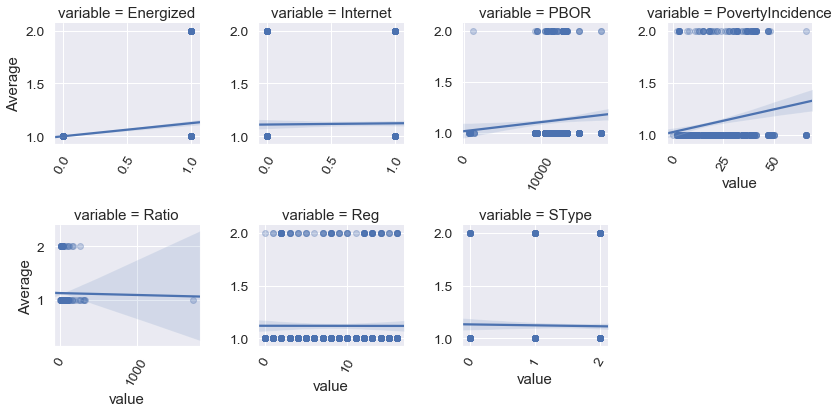

In [57]:

g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')

g = g.map(sns.regplot, 'value', 'Average', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

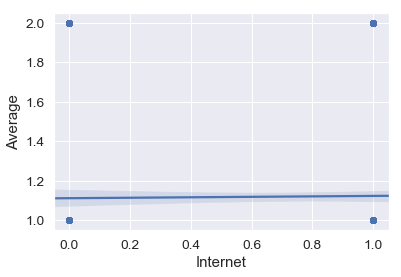

In [58]:
#scatter plot internet/overall
sns.regplot(x = 'Internet', y = 'Average', data = df2)

*There appears to be a linear relationship between Living Area and Sale Price*

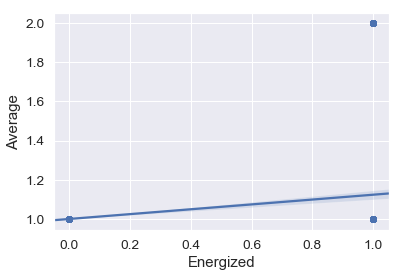

In [59]:
sns.regplot(x = 'Energized', y = 'Average', data = df2)

#### Violin Plots
<a href = "https://datavizcatalogue.com/methods/violin_plot.html">Interpreting Violin Plots</a>

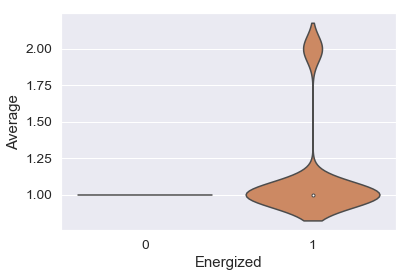

In [60]:
# Violinplots on SalePrice given Functional feature, categorical data
sns.violinplot(data=df2,x="Energized", y="Average")

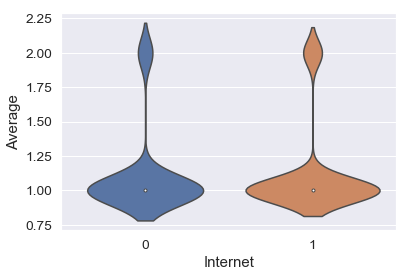

In [61]:
# Violinplots on SalePrice given Functional feature, categorical data
sns.violinplot(data=df2,x="Internet", y="Average")

#### Pair Plots 
<i>If you want all plots in one go</i>

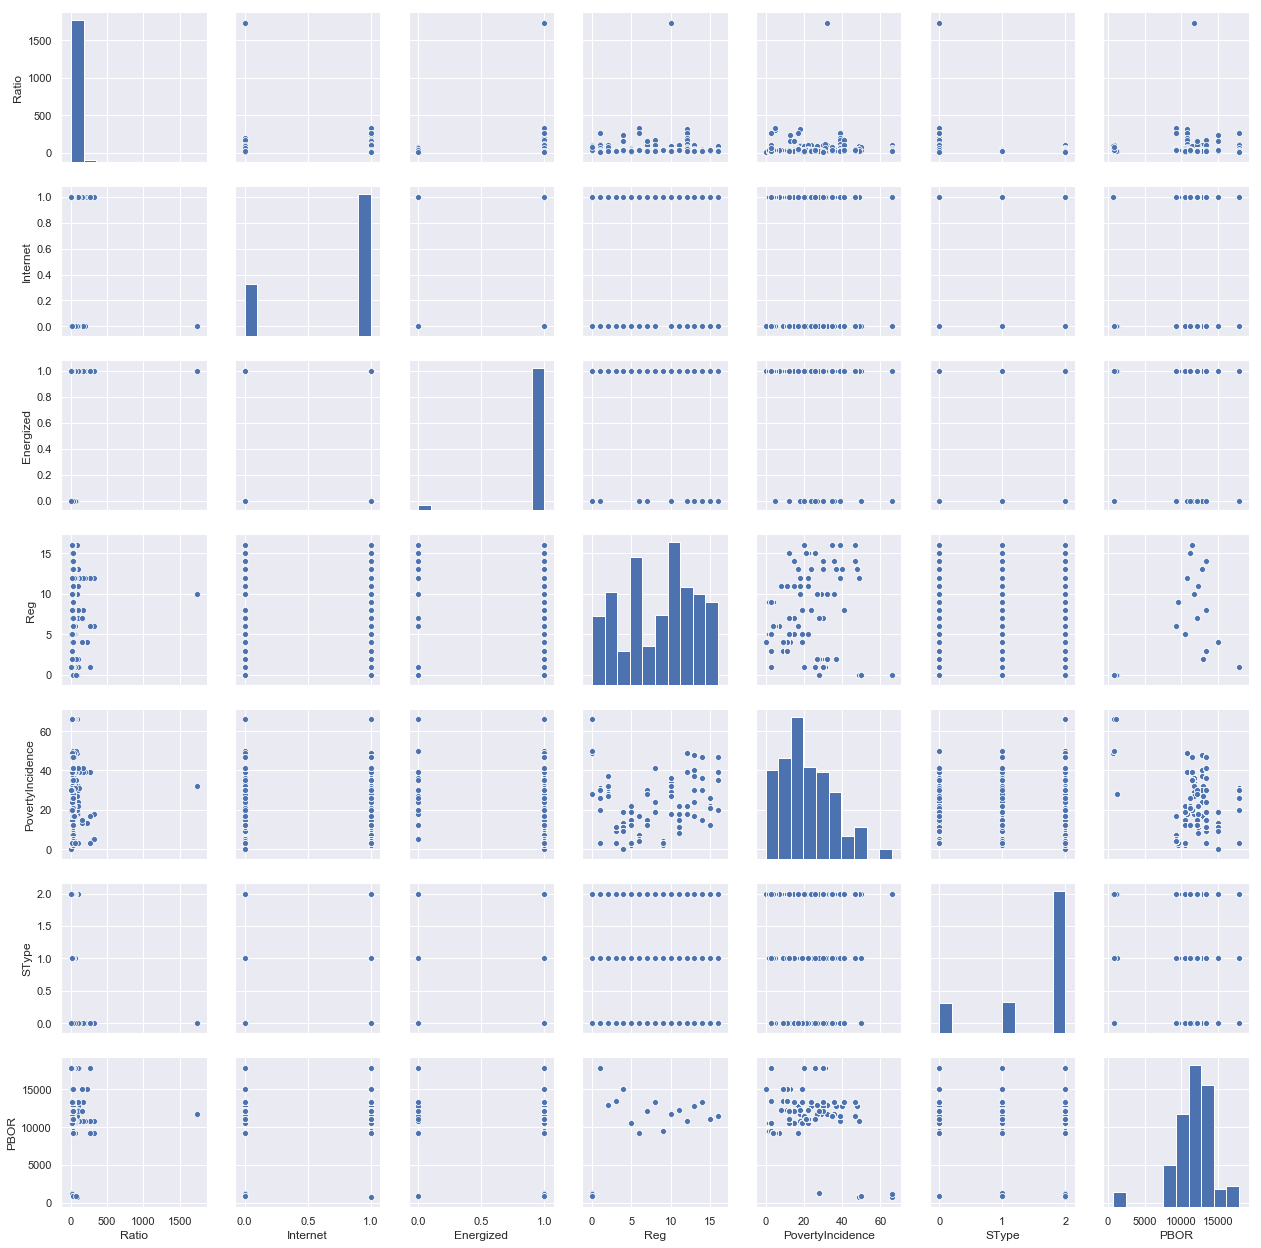

In [62]:
sns.set()
cols = ['Ratio', 'Internet', 'Energized', 'Reg', 'PovertyIncidence', 'SType', 'PBOR']
sns.pairplot(df[cols], size = 2.5)
plt.show();

_________